In [1]:
pip install tensorflow pandas numpy matplotlib scikit-learn


In [3]:
pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import LabelEncoder

In [12]:
pip install tensorflow==2.10


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.10 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.10


In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # Enable verbose logs

import tensorflow as tf
print("Devices: ", tf.config.list_physical_devices())


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [8]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf

# List physical GPUs
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Devices: ", tf.config.list_physical_devices())


Num GPUs Available:  0
Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
# Load the data from the CSV file
data_transient_nd  = pd.read_csv('Pressure_readings/LO_NL_Transient_P2.csv')
data_nd = pd.read_csv('Pressure_readings/LO_NL_ND_P2.csv')
data_gasket_transient = pd.read_csv('Pressure_readings/LO_GL_Transient_P2.csv')
data_gasket_nd = pd.read_csv('Pressure_readings/LO_GL_ND_P2.csv')
data_crack_transient = pd.read_csv('Pressure_readings/LO_CC_Transient_P2.csv')
data_crack_nd = pd.read_csv('Pressure_readings/LO_CC_ND_P2.csv')

data_Longitudinal_transient = pd.read_csv('Pressure_readings/LO_LC_Transient_P2.csv')
data_Longitudinal_nd = pd.read_csv('Pressure_readings/LO_LC_ND_P2.csv')





no_leak_data = pd.concat([data_transient_nd, data_nd])
no_leak_data['Category'] = 'No Leak'
# Filter the data for the 15 to 25-second interval

filtered_no_leak_data = no_leak_data[
    (no_leak_data['Sample'] >= 15) & (no_leak_data['Sample'] <= 25)
]



gasket_leak_data = pd.concat([data_gasket_transient, data_gasket_nd])
gasket_leak_data['Category'] = 'Gasket Leak'

# Filter the data for the 15 to 25-second interval
filtered_gasket_leak_data = gasket_leak_data[
    (gasket_leak_data['Sample'] >= 15) & (gasket_leak_data['Sample'] <= 25)
]


circumferential_crack_data = pd.concat([data_crack_transient, data_crack_nd])
circumferential_crack_data['Category'] = 'Circumferential Crack'

filtered_circumferential_crack_data = circumferential_crack_data[
    (circumferential_crack_data['Sample'] >= 18) & (circumferential_crack_data['Sample'] <= 30)
]


combined_data = pd.concat([filtered_no_leak_data, filtered_gasket_leak_data, filtered_circumferential_crack_data])


label_encoder = LabelEncoder()
combined_data['Category'] = label_encoder.fit_transform(combined_data['Category'])

X = combined_data[['Sample', 'Value']].values  # Features: Sample and Value
y = combined_data['Category'].values


print("Encoded Categories:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded Categories:
{'Circumferential Crack': 0, 'Gasket Leak': 1, 'No Leak': 2}


In [3]:
num_rows = combined_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 1638406


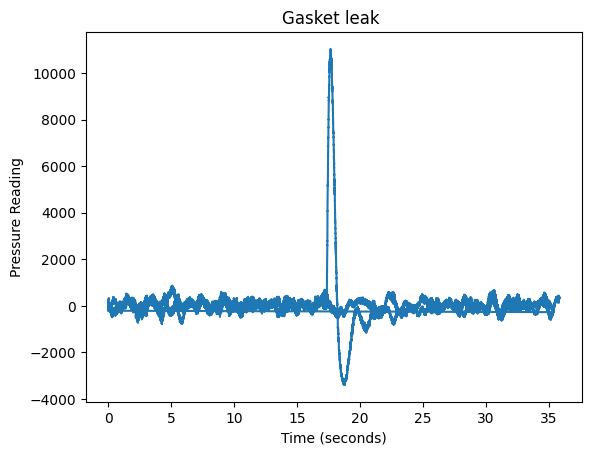

In [ ]:


# Plot the filtered data
plt.plot(gasket_leak_data['Sample'], gasket_leak_data['Value'])
plt.title('Gasket leak ')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure Reading')
plt.show()


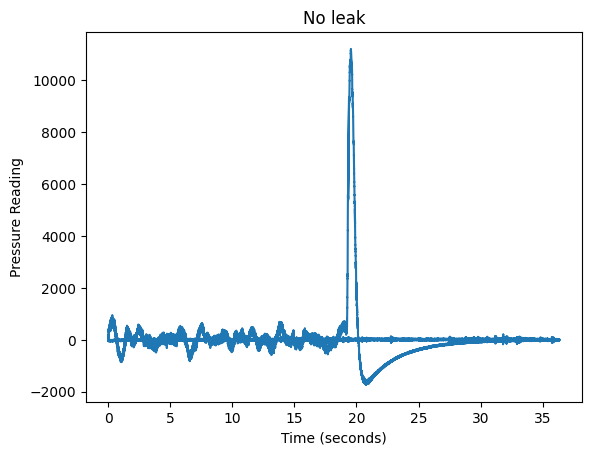

In [ ]:

plt.plot(no_leak_data['Sample'], no_leak_data['Value'])
plt.title('No leak')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure Reading')
plt.show()

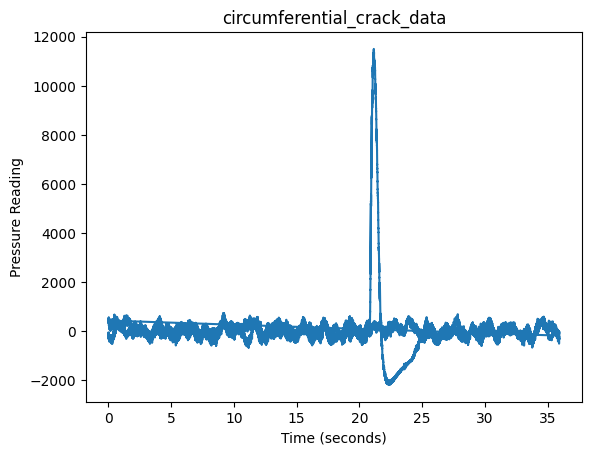

In [ ]:

plt.plot(circumferential_crack_data['Sample'], circumferential_crack_data['Value'])
plt.title('circumferential_crack_data')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure Reading')
plt.show()

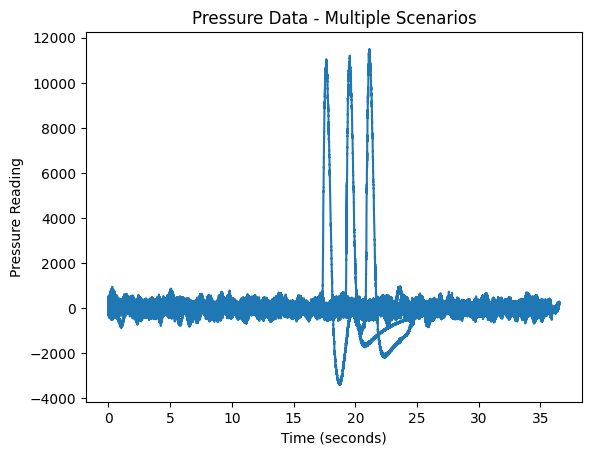

In [ ]:

plt.plot(combined_data['Sample'], combined_data['Value'])
plt.title('Pressure Data - Multiple Scenarios')
plt.xlabel('Time (minutes )')
plt.ylabel('Pressure Reading')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:

print(X_train[:50])  


[[ 1.83186719e+01  4.57996365e+02]
 [ 1.53915234e+01  7.23922191e+00]
 [ 2.37611719e+01 -2.89303018e+02]
 [ 1.95789844e+01  2.32779529e+02]
 [ 1.90051172e+01  7.16908622e+01]
 [ 2.07239453e+01 -3.19272489e+00]
 [ 2.34791016e+01  7.42786320e+01]
 [ 2.42385547e+01  2.65369255e+02]
 [ 2.34784375e+01  1.91456081e+02]
 [ 2.25096484e+01 -5.97975428e+02]
 [ 1.79862500e+01 -4.67804716e+01]
 [ 2.36517969e+01  9.59512036e+01]
 [ 2.07920703e+01 -1.40827083e+03]
 [ 2.16965625e+01  2.88740050e+02]
 [ 1.92955469e+01  2.02373235e+02]
 [ 1.56166797e+01 -2.03366995e+01]
 [ 1.93296875e+01  5.02554526e+02]
 [ 1.78331641e+01 -3.58606726e+02]
 [ 2.28575391e+01 -7.87044356e+02]
 [ 1.84367578e+01 -9.68376427e+01]
 [ 2.39541406e+01 -7.40329218e+01]
 [ 1.63130469e+01 -7.52459389e+01]
 [ 2.08427344e+01 -1.47946095e+02]
 [ 1.94989063e+01  9.26091703e+00]
 [ 2.84767578e+01 -1.08725210e+02]
 [ 2.46632422e+01  1.14955138e+02]
 [ 2.95237500e+01 -3.92166865e+02]
 [ 2.73205469e+01 -1.24979639e+02]
 [ 2.18513672e+01 -2

In [2]:
window_size = 50

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model for multiclass classification with added layers
model = Sequential()
model.add(LSTM(256, input_shape=(window_size, 1), return_sequences=True))
model.add(LSTM(128, return_sequences=True))  # Additional LSTM layer with return_sequences=True
model.add(LSTM(64, activation='sigmoid', return_sequences=True))  # LSTM with sigmoid activation
model.add(GlobalMaxPooling1D())  # Global max pooling layer
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Display the model summary to confirm the architecture
model.summary()

c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,899 (1.96 MB)

 Trainable params: 512,899 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test) ,  callbacks=[early_stopping],verbose=1)

Epoch 1/8
40961/40961 ━━━━━━━━━━━━━━━━━━━━ 327s 8ms/step - accuracy: 0.8005 - loss: 0.4464 - val_accuracy: 0.8446 - val_loss: 0.3447
Epoch 2/8
40961/40961 ━━━━━━━━━━━━━━━━━━━━ 309s 8ms/step - accuracy: 0.8524 - loss: 0.3352 - val_accuracy: 0.8580 - val_loss: 0.3225
Epoch 3/8
40961/40961 ━━━━━━━━━━━━━━━━━━━━ 310s 8ms/step - accuracy: 0.8583 - loss: 0.3217 - val_accuracy: 0.8652 - val_loss: 0.3034
Epoch 4/8
40961/40961 ━━━━━━━━━━━━━━━━━━━━ 313s 8ms/step - accuracy: 0.8615 - loss: 0.3123 - val_accuracy: 0.8722 - val_loss: 0.2834
Epoch 5/8
40961/40961 ━━━━━━━━━━━━━━━━━━━━ 325s 8ms/step - accuracy: 0.8642 - loss: 0.3051 - val_accuracy: 0.8652 - val_loss: 0.2971
Epoch 6/8
40961/40961 ━━━━━━━━━━━━━━━━━━━━ 351s 9ms/step - accuracy: 0.8676 - loss: 0.2984 - val_accuracy: 0.8499 - val_loss: 0.3490
Epoch 7/8
40961/40961 ━━━━━━━━━━━━━━━━━━━━ 339s 8ms/step - accuracy: 0.8675 - loss: 0.2970 - val_accuracy: 0.8749 - val_loss: 0.2805
Epoch 8/8
40961/40961 ━━━━━━━━━━━━━━━━━━━━ 433s 11ms/step - accuracy:

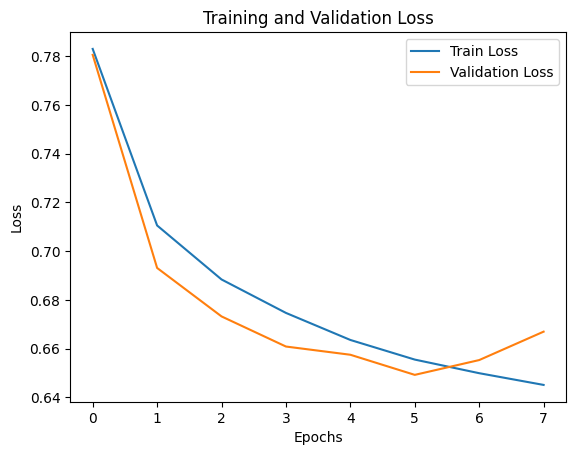

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


10241/10241 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8710 - loss: 0.2859
Test Accuracy: 87.04%


In [19]:
model.save("model.h5")


In [10]:
model.save("model.keras")
